In [1]:
# cargar dataset

import json
from pprint import pprint
dataset = list()
with open("../datasets/clasificado/comentarios_clasificados_con_manual.json", "rt", encoding="utf-8") as arc:
    dataset = json.load(arc)

pprint(dataset[:50])


[{'aspectos': {'AvailabilityAndScalability': [],
               'Deployability': [],
               'Interoperability': ['monadic', 'monadic'],
               'Maintainability': [],
               'Performance': [],
               'Reliability': [],
               'Securability': []},
  'clas_manual': {'AvailabilityAndScalability': None,
                  'Deployability': None,
                  'Interoperability': 0,
                  'Maintainability': None,
                  'Performance': None,
                  'Reliability': None,
                  'Securability': None},
  'clas_modelo': {'AvailabilityAndScalability': None,
                  'Deployability': None,
                  'Interoperability': -1,
                  'Maintainability': None,
                  'Performance': None,
                  'Reliability': None,
                  'Securability': None},
  'clas_modelo_neutro': {'AvailabilityAndScalability': None,
                         'Deployability': None,
        

               'Performance': [],
               'Reliability': [],
               'Securability': []},
  'clas_manual': {'AvailabilityAndScalability': None,
                  'Deployability': None,
                  'Interoperability': -1,
                  'Maintainability': None,
                  'Performance': None,
                  'Reliability': None,
                  'Securability': None},
  'clas_modelo': {'AvailabilityAndScalability': None,
                  'Deployability': None,
                  'Interoperability': -1,
                  'Maintainability': None,
                  'Performance': None,
                  'Reliability': None,
                  'Securability': None},
  'clas_modelo_neutro': {'AvailabilityAndScalability': None,
                         'Deployability': None,
                         'Interoperability': 0,
                         'Maintainability': None,
                         'Performance': None,
                         'Reliability': None,

  'clas_tb': {'AvailabilityAndScalability': None,
              'Deployability': None,
              'Interoperability': 1,
              'Maintainability': None,
              'Performance': None,
              'Reliability': None,
              'Securability': None},
  'clas_tb_no_neutro': {'AvailabilityAndScalability': None,
                        'Deployability': None,
                        'Interoperability': 1,
                        'Maintainability': None,
                        'Performance': None,
                        'Reliability': None,
                        'Securability': None},
  'comentario': '@pigworker: the irritating thing here is that the induction '
                "involved is clearly within ghc's capability to understand, "
                'but the usual approach of brazenly asserting an inductive '
                'step knowing that ghc will be able to figure things out at '
                'the call site fails because class constraints must be '
     

  'comentario': 'above there are very good detailed answers with theoretical '
                'background. but i want to give my view on io monad. i am not '
                'experienced haskell programmer, so may be it is quite naive '
                'or even wrong. but i helped me to deal with io monad to some '
                'extent (note, that it do not relates to other monads). first '
                'i want to say, that example with "real world" is not too '
                'clear for me as we cannot access its (real world) previous '
                'states. may be it do not relates to monad computations at all '
                'but it is desired in the sense of referential transparency, '
                'which is generally presents in haskell code. so we want our '
                'language (haskell) to be pure. but we need input/output '
                'operations as without them our program cannot be useful. and '
                'those operations cannot be pure by th

In [2]:
# dividir datasets en predicho_dos y esperado_dos para nb vs textblob
import numpy as np

predicho_dos = list()
esperado_dos = list()

# objeto con propiedades de los comentarios.
for elemento in dataset:
    # recorrer cada aspecto
    for aspecto in elemento["aspectos"]:
        # si el valor de la llave aspecto no es falsy
        if elemento["aspectos"][aspecto]:
            # agregamos el valor del sentimiento que predijo el clasificador a la lista de predichos
            if elemento["clas_modelo"][aspecto] == -1:
                predicho_dos.append([1,0])
            #elif elemento["clas_modelo"][aspecto] == 0:
            #    predicho_dos.append([0,1,0])
            else:
                predicho_dos.append([0,1])
            # agregamos el valor del sentimiento esperado del clasificador a la lista de esperados
            if elemento["clas_tb_no_neutro"][aspecto] == -1:
                esperado_dos.append([1,0])
            #elif elemento["clas_tb_no_neutro"][aspecto] == 0:
            #    esperado_dos.append([0,1,0])
            else:
                esperado_dos.append([0,1])

predicho_dos = np.array(predicho_dos)
esperado_dos = np.array(esperado_dos)


In [3]:
# dividir datasets en predicho_dos para nb vs clasificacion manual.

predicho_dos_manual = list()
esperado_dos_manual = list()

# objeto con propiedades de los comentarios.
for elemento in dataset:
    # recorrer cada aspecto
    for aspecto in elemento["aspectos"]:
        # si el valor de la llave aspecto no es falsy
        if elemento["aspectos"][aspecto]:
            # agregamos el valor del sentimiento que predijo el clasificador a la lista de predichos
            if elemento["clas_modelo"][aspecto] == -1:
                predicho_dos_manual.append([1,0])
            #elif elemento["clas_modelo"][aspecto] == 0:
            #    predicho_dos.append([0,1,0])
            else:
                predicho_dos_manual.append([0,1])
            # agregamos el valor del sentimiento esperado del clasificador a la lista de esperados
            # forzamos los neutrales a ser negativos.
            if elemento["clas_manual"][aspecto] <= 0:
                esperado_dos_manual.append([1,0])
            #elif elemento["clas_tb_no_neutro"][aspecto] == 0:
            #    esperado_dos.append([0,1,0])
            else:
                esperado_dos_manual.append([0,1])

predicho_dos_manual = np.array(predicho_dos_manual)
esperado_dos_manual = np.array(esperado_dos_manual)

In [4]:
# dividir datasets en predicho_dos para manual vs textblob.

predicho_dos_m_t = list()
esperado_dos_m_t = list()

# objeto con propiedades de los comentarios.
for elemento in dataset:
    # recorrer cada aspecto
    for aspecto in elemento["aspectos"]:
        # si el valor de la llave aspecto no es falsy
        if elemento["aspectos"][aspecto]:
            # agregamos el valor del sentimiento que predijo el clasificador a la lista de predichos
            if elemento["clas_tb_no_neutro"][aspecto] <= 0:
                predicho_dos_m_t.append([1,0])
            #elif elemento["clas_modelo"][aspecto] == 0:
            #    predicho_dos.append([0,1,0])
            else:
                predicho_dos_m_t.append([0,1])
            # agregamos el valor del sentimiento esperado del clasificador a la lista de esperados
            # forzamos los neutrales a ser negativos.
            if elemento["clas_manual"][aspecto] <= 0:
                esperado_dos_m_t.append([1,0])
            #elif elemento["clas_tb_no_neutro"][aspecto] == 0:
            #    esperado_dos.append([0,1,0])
            else:
                esperado_dos_m_t.append([0,1])

predicho_dos_m_t = np.array(predicho_dos_m_t)
esperado_dos_m_t = np.array(esperado_dos_m_t)

In [5]:
# para tres clases nb vs textblob

predicho_tres = list()
esperado_tres = list()

# objeto con propiedades de los comentarios.
for elemento in dataset:
    # recorrer cada aspecto
    for aspecto in elemento["aspectos"]:
        # si el valor de la llave aspecto no es falsy
        if elemento["aspectos"][aspecto]:
            # agregamos el valor del sentimiento que predijo el clasificador a la lista de predichos
            if elemento["clas_modelo_neutro"][aspecto] == -1:
                predicho_tres.append([1,0,0])
            elif elemento["clas_modelo_neutro"][aspecto] == 0:
                predicho_tres.append([0,1,0])
            else:
                predicho_tres.append([0,0,1])
            # agregamos el valor del sentimiento esperado del clasificador a la lista de esperados
            if elemento["clas_tb"][aspecto] == -1:
                esperado_tres.append([1,0,0])
            elif elemento["clas_tb"][aspecto] == 0:
                esperado_tres.append([0,1,0])
            else:
                esperado_tres.append([0,0,1])

predicho_tres = np.array(predicho_tres)
esperado_tres = np.array(esperado_tres)


In [6]:
# con tres clases para nb vs manual.

predicho_tres_manual = list()
esperado_tres_manual = list()

# objeto con propiedades de los comentarios.
for elemento in dataset:
    # recorrer cada aspecto
    for aspecto in elemento["aspectos"]:
        # si el valor de la llave aspecto no es falsy
        if elemento["aspectos"][aspecto]:
            # agregamos el valor del sentimiento que predijo el clasificador a la lista de predichos
            if elemento["clas_modelo_neutro"][aspecto] == -1:
                predicho_tres_manual.append([1,0,0])
            elif elemento["clas_modelo_neutro"][aspecto] == 0:
                predicho_tres_manual.append([0,1,0])
            else:
                predicho_tres_manual.append([0,0,1])
            # agregamos el valor del sentimiento esperado del clasificador a la lista de esperados
            if elemento["clas_manual"][aspecto] == -1:
                esperado_tres_manual.append([1,0,0])
            elif elemento["clas_manual"][aspecto] == 0:
                esperado_tres_manual.append([0,1,0])
            else:
                esperado_tres_manual.append([0,0,1])

predicho_tres_manual = np.array(predicho_tres_manual)
esperado_tres_manual = np.array(esperado_tres_manual)

In [7]:
# con tres clases para TextBlob vs Clasificacion Manual.

predicho_tres_m_t = list()
esperado_tres_m_t = list()

# objeto con propiedades de los comentarios.
for elemento in dataset:
    # recorrer cada aspecto
    for aspecto in elemento["aspectos"]:
        # si el valor de la llave aspecto no es falsy
        if elemento["aspectos"][aspecto]:
            # agregamos el valor del sentimiento que predijo el clasificador a la lista de predichos
            if elemento["clas_tb"][aspecto] == -1:
                predicho_tres_m_t.append([1,0,0])
            elif elemento["clas_tb"][aspecto] == 0:
                predicho_tres_m_t.append([0,1,0])
            else:
                predicho_tres_m_t.append([0,0,1])
            # agregamos el valor del sentimiento esperado del clasificador a la lista de esperados
            if elemento["clas_manual"][aspecto] == -1:
                esperado_tres_m_t.append([1,0,0])
            elif elemento["clas_manual"][aspecto] == 0:
                esperado_tres_m_t.append([0,1,0])
            else:
                esperado_tres_m_t.append([0,0,1])

predicho_tres_m_t = np.array(predicho_tres_m_t)
esperado_tres_m_t = np.array(esperado_tres_m_t)

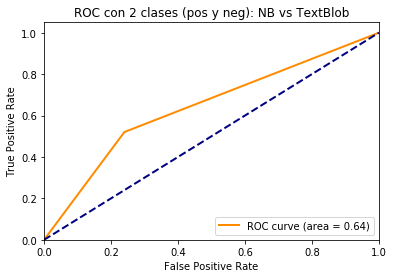

In [14]:
# Generar ROC para dos clases nb vs textblob
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(esperado_dos[:, i], predicho_dos[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC con 2 clases (pos y neg): NB vs TextBlob')
plt.legend(loc="lower right")
plt.show()

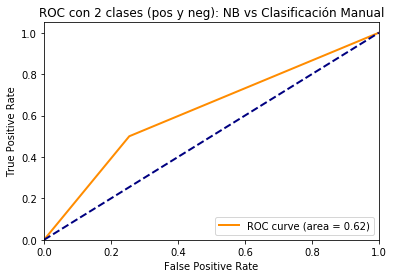

In [9]:
# Generar ROC para dos clases nb vs Manual
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(esperado_dos_manual[:, i], predicho_dos_manual[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC con 2 clases (pos y neg): NB vs Clasificación Manual')
plt.legend(loc="lower right")
plt.show()

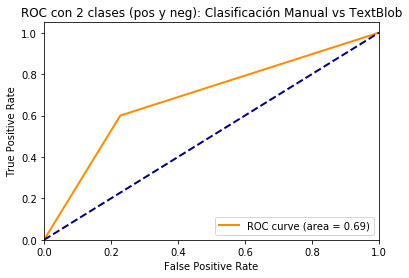

In [10]:
# Generar ROC para dos clases manual vs textblob
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(esperado_dos_m_t[:, i], predicho_dos_m_t[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC con 2 clases (pos y neg): Clasificación Manual vs TextBlob')
plt.legend(loc="lower right")
plt.show()

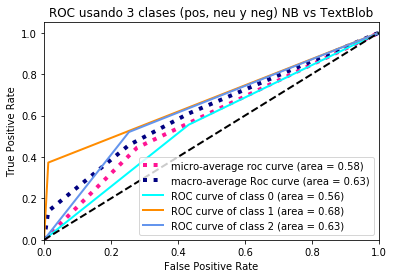

In [11]:
# Generar ROC para tres clases NB vs Textblob

from scipy import interp

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(esperado_tres[:, i], predicho_tres[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(esperado_tres.ravel(), predicho_tres.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# then interpolate all roc curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# finally average it and compute auc
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle

# plot all roc curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
        label="micro-average roc curve (area = {0:0.2f})"
        "".format(roc_auc["micro"]),
        color="deeppink", linestyle=":", linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label="macro-average Roc curve (area = {0:0.2f})"
        "".format(roc_auc["macro"]),
        color="navy", linestyle=":", linewidth=4)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label="ROC curve of class {0} (area = {1:0.2f})"
                "".format(i, roc_auc[i]))
        
plt.plot([0, 1], [0, 1], "k--" , lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0 , 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC usando 3 clases (pos, neu y neg) NB vs TextBlob")
plt.legend(loc="lower right")
plt.show()

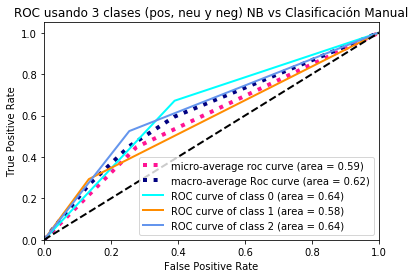

In [12]:
# Generar ROC para tres clases NB vs Clasificación Manual

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(esperado_tres_manual[:, i], predicho_tres_manual[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(esperado_tres_manual.ravel(), predicho_tres_manual.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# then interpolate all roc curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# finally average it and compute auc
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle

# plot all roc curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
        label="micro-average roc curve (area = {0:0.2f})"
        "".format(roc_auc["micro"]),
        color="deeppink", linestyle=":", linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label="macro-average Roc curve (area = {0:0.2f})"
        "".format(roc_auc["macro"]),
        color="navy", linestyle=":", linewidth=4)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label="ROC curve of class {0} (area = {1:0.2f})"
                "".format(i, roc_auc[i]))
        
plt.plot([0, 1], [0, 1], "k--" , lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0 , 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC usando 3 clases (pos, neu y neg) NB vs Clasificación Manual")
plt.legend(loc="lower right")
plt.show()

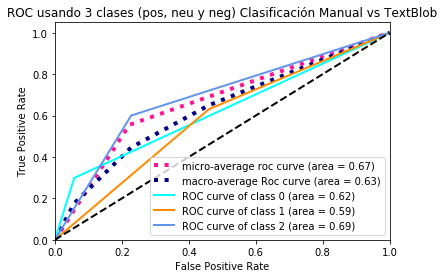

In [13]:
# Generar ROC para tres clases Manual vs TextBlob

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(esperado_tres_m_t[:, i], predicho_tres_m_t[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(esperado_tres_m_t.ravel(), predicho_tres_m_t.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# then interpolate all roc curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# finally average it and compute auc
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

from itertools import cycle

# plot all roc curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
        label="micro-average roc curve (area = {0:0.2f})"
        "".format(roc_auc["micro"]),
        color="deeppink", linestyle=":", linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label="macro-average Roc curve (area = {0:0.2f})"
        "".format(roc_auc["macro"]),
        color="navy", linestyle=":", linewidth=4)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label="ROC curve of class {0} (area = {1:0.2f})"
                "".format(i, roc_auc[i]))
        
plt.plot([0, 1], [0, 1], "k--" , lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0 , 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC usando 3 clases (pos, neu y neg) Clasificación Manual vs TextBlob")
plt.legend(loc="lower right")
plt.show()